<a href="https://colab.research.google.com/github/Git-sDev-Dan007/Data_Analytics/blob/MAIN/Cement1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

# Upload your CSV file
uploaded = files.upload()

# Assuming your CSV file is named 'your_dataset.csv', adjust the filename accordingly
filename = next(iter(uploaded))

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(filename)

# Define weights for each criterion
weights = {
    'Cement': 2,
    'Fine Aggregate': 1,
    'Coarse Aggregate': 1,
    'Water': 2,
    'Superplasticizer': 2
}

# Define function to calculate aggregated score for each row
def calculate_aggregated_score(row):
    score = 0
    for column, weight in weights.items():
        # Assuming values are represented as integers (e.g., M=1, L=2, VL=3, etc.)
        score += weight * row[column]
    return score

# Add 'Aggregated Score' column to the DataFrame
data['Aggregated Score'] = data.apply(calculate_aggregated_score, axis=1)

# Now the DataFrame contains the 'Aggregated Score' column
print(data)


Saving concrete.csv to concrete.csv
      Cement  Water  Fine Aggregate  Coarse Aggregate  Superplasticizer  \
0      141.3  203.5           748.5             971.8               0.0   
1      168.9  158.3           796.2            1080.8              10.8   
2      250.0  187.4           861.2             956.9               5.5   
3      266.0  228.0           670.0             932.0               0.0   
4      154.8  193.3           696.7            1047.4               9.1   
...      ...    ...             ...               ...               ...   
1025   135.0  180.0           805.0             961.0              10.0   
1026   531.3  141.8           893.7             852.1              28.2   
1027   276.4  179.6           768.3             870.1               8.9   
1028   342.0  228.0           670.0             932.0               0.0   
1029   540.0  173.0           613.0            1125.0               0.0   

      Classification  Aggregated Score  
0                  2  

In [ ]:
# Save the modified DataFrame to a new CSV file
data.to_csv('modified_dataset.csv', index=False)
import os

# List files in the current directory
files = os.listdir('.')
print(files)
import pandas as pd

# Read the modified dataset from the saved CSV file
modified_data = pd.read_csv('modified_dataset.csv')

# Display the first few rows of the modified dataset to verify
print(modified_data.head())


['.config', 'modified_dataset.csv', 'concrete.csv', 'sample_data']
   Cement  Water  Fine Aggregate  Coarse Aggregate  Superplasticizer  \
0   141.3  203.5           748.5             971.8               0.0   
1   168.9  158.3           796.2            1080.8              10.8   
2   250.0  187.4           861.2             956.9               5.5   
3   266.0  228.0           670.0             932.0               0.0   
4   154.8  193.3           696.7            1047.4               9.1   

   Classification  Aggregated Score  
0               2            2409.9  
1               3            2553.0  
2               2            2703.9  
3               2            2590.0  
4               3            2458.5  


In [ ]:
from google.colab import files

# Replace 'your_dataset.csv' with the name of your dataset file
file_name = 'modified_dataset.csv'

# Download the dataset file
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Classification of the Dataset and Training of our Model


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data into features (X) and target variable (y)
X = data.drop(columns=['Classification'])  # Features
y = data['Classification']  # Target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict the concrete type for the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy-Ratio:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00       113
           3       1.00      1.00      1.00        59

    accuracy                           1.00       206
   macro avg       1.00      1.00      1.00       206
weighted avg       1.00      1.00      1.00       206



Prediction of concrete class:


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['Classification'])  # Features (Aggregated Score)
y = data['Classification']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Evaluate the model's performance on the testing data
y_pred = rf_classifier.predict(X_test)

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Predict concrete type for the entire dataset
all_predictions = rf_classifier.predict(X)

# Analyze the predictions
prediction_counts = pd.Series(all_predictions).value_counts()
most_frequent_concrete_type = prediction_counts.idxmax()
print("Most frequently predicted concrete type:", most_frequent_concrete_type)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00       113
           3       1.00      1.00      1.00        59

    accuracy                           1.00       206
   macro avg       1.00      1.00      1.00       206
weighted avg       1.00      1.00      1.00       206

Most frequently predicted concrete type: 2


In [ ]:

# Define concrete type names
concrete_type_names = {
    0: "Light weight concrete",
    1: "Plain Concrete",
    2: "Self compacting concrete",
    3: "Heavy weight concrete"
}

# Find the most frequently predicted concrete type
most_frequent_concrete_type_label = data['Classification'].mode()[0]
most_frequent_concrete_type = concrete_type_names[most_frequent_concrete_type_label]

print("Most frequently predicted concrete type:", most_frequent_concrete_type)


Most frequently predicted concrete type: Self compacting concrete


Final Analysis,Using graphs !!



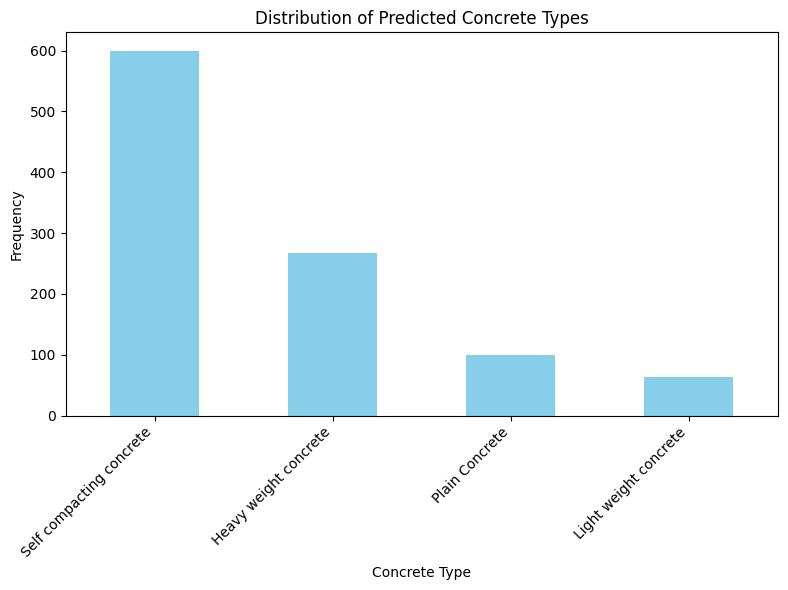

In [ ]:
import matplotlib.pyplot as plt
# Define concrete type names
concrete_type_names = {
    0: "Light weight concrete",
    1: "Plain Concrete",
    2: "Self compacting concrete",
    3: "Heavy weight concrete"
}

# Plot the distribution of predicted concrete types
plt.figure(figsize=(8, 6))
data['Classification'].map(concrete_type_names).value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Predicted Concrete Types')
plt.xlabel('Concrete Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Plot distribution based on the Aggregated Score.


<ipython-input-17-b4aaa0235045>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Classification', y='Aggregated Score', data=data, palette='viridis')


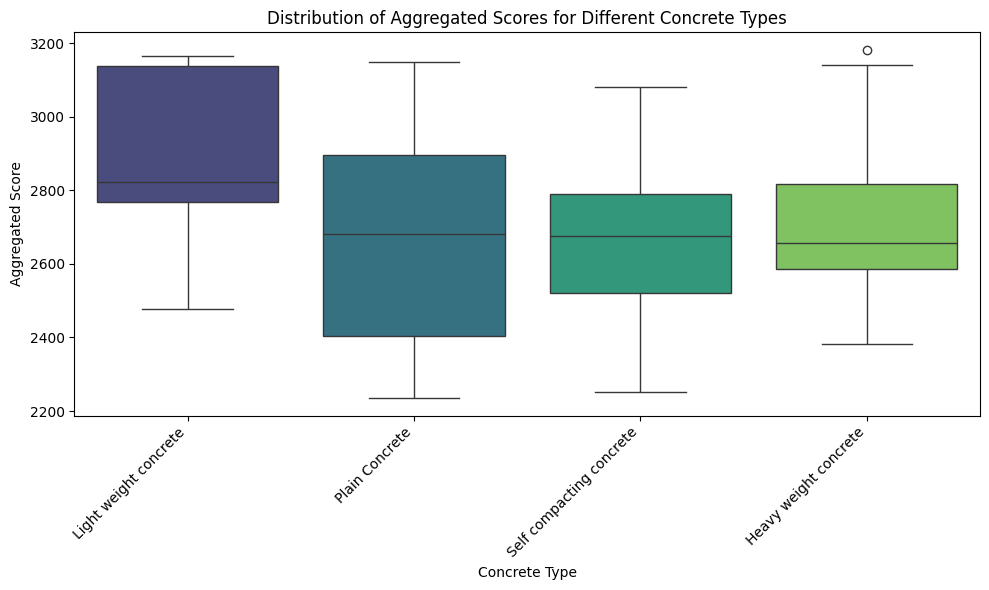

In [ ]:
import seaborn as sns

# Define concrete type names
concrete_type_names = {
    0: "Light weight concrete",
    1: "Plain Concrete",
    2: "Self compacting concrete",
    3: "Heavy weight concrete"
}

# Plot the distribution of aggregated scores for each concrete type

plt.figure(figsize=(10, 6))
sns.boxplot(x='Classification', y='Aggregated Score', data=data, palette='viridis')
plt.title('Distribution of Aggregated Scores for Different Concrete Types')
plt.xlabel('Concrete Type')
plt.ylabel('Aggregated Score')
plt.xticks(ticks=[0, 1, 2, 3], labels=[concrete_type_names[i] for i in range(4)], rotation=45, ha='right')
plt.tight_layout()
plt.show()
